# Use a simple Neural Network (fully connected)

## Libraries

In [1]:
from modules.data_exploration.data_ex import import_data, gen_bulk_data, get_bulk_inst

from modules.build_ml_models.NN_classification import build_model, build_model_seq

from modules.build_ml_models.NN_classification import plot_confusion_matrix, print_classification_report


## Load data

In [2]:
file_path = 'data/churn.csv'
data_dict = gen_bulk_data(file_path)
data_dict.keys()

dict_keys(['original', 'dropped', 'scaled', 'encoded', 'encoded and scaled', 'scaled and dropped'])

In [3]:
key = 'original'

x_train, x_test, x_val, y_train, y_test, y_val = get_bulk_inst(data_dict, key)

In [4]:
x_train

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,43,98,408,660,0,0,0,158.5,90,26.95,254.4,67,21.62,178.4,104,8.03,14.8,5,4.00,2
1,40,108,510,3449,0,0,0,187.4,101,31.86,199.9,126,16.99,216.1,107,9.72,12.6,8,3.40,1
2,27,98,510,828,0,0,0,167.0,60,28.39,125.1,65,10.63,262.5,100,11.81,8.9,2,2.40,1
3,19,34,415,2428,0,0,0,293.7,89,49.93,272.5,71,23.16,178.2,76,8.02,11.0,10,2.97,2
4,50,90,415,1718,0,0,0,246.4,83,41.89,160.3,88,13.63,170.9,99,7.69,7.6,7,2.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,49,116,415,3783,0,0,0,255.5,93,43.44,224.4,122,19.07,317.3,85,14.28,12.7,4,3.43,1
3496,40,100,408,2098,0,1,41,306.9,71,52.17,243.3,72,20.68,125.9,114,5.67,10.5,4,2.84,2
3497,19,98,415,4527,0,0,0,182.6,76,31.04,145.2,75,12.34,162.6,127,7.32,12.0,1,3.24,6
3498,36,176,408,2101,0,0,0,47.4,125,8.06,167.8,90,14.26,163.1,107,7.34,10.5,8,2.84,2


In [5]:
print('X_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('X_train type:', type(x_train))
print('y_train type:', type(y_train))


X_train shape: (3500, 20)
y_train shape: (3500,)
X_train type: <class 'pandas.core.frame.DataFrame'>
y_train type: <class 'pandas.core.series.Series'>


## Build simple model

In [6]:
from tensorflow.keras.optimizers import Adam

optimizer= Adam(0.0001)

In [7]:
model = build_model(input_shape=20, hidden_shapes=[32], hidden_activation='relu',
                    opt=optimizer, dropout=0.0, loss='binary_crossentropy')

32


In [8]:
model.summary()

Model: "DENSE_CHURN_PREDICTION"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 20)]              0         
_________________________________________________________________
hidden_dense_1 (Dense)       (None, 32)                672       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


## Fit simple model

In [9]:
epo = 100

history = model.fit(x_train, y_train, epochs=epo, validation_data=(x_val, y_val), verbose=1)

Epoch 1/200
110/110 [==============================] - 1s 5ms/step - loss: 29.8058 - accuracy: 0.7326 - precision: 0.1403 - recall: 0.1737 - val_loss: 24.4518 - val_accuracy: 0.6720 - val_precision: 0.0930 - val_recall: 0.1509
Epoch 2/200
110/110 [==============================] - 0s 3ms/step - loss: 15.9018 - accuracy: 0.6817 - precision: 0.1221 - recall: 0.2020 - val_loss: 11.8561 - val_accuracy: 0.6427 - val_precision: 0.0950 - val_recall: 0.1792
Epoch 3/200
110/110 [==============================] - 0s 3ms/step - loss: 7.3384 - accuracy: 0.6900 - precision: 0.1118 - recall: 0.1717 - val_loss: 5.0067 - val_accuracy: 0.6827 - val_precision: 0.0926 - val_recall: 0.1415
Epoch 4/200
110/110 [==============================] - 0s 2ms/step - loss: 3.8275 - accuracy: 0.7197 - precision: 0.0990 - recall: 0.1212 - val_loss: 3.2569 - val_accuracy: 0.6973 - val_precision: 0.0993 - val_recall: 0.1415
Epoch 5/200
110/110 [==============================] - 0s 2ms/step - loss: 2.9484 - accuracy: 0.

110/110 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.8549 - precision: 0.4519 - recall: 0.1232 - val_loss: 0.6048 - val_accuracy: 0.8507 - val_precision: 0.3333 - val_recall: 0.0566
Epoch 38/200
110/110 [==============================] - 0s 2ms/step - loss: 0.5436 - accuracy: 0.8517 - precision: 0.4189 - recall: 0.1253 - val_loss: 0.5540 - val_accuracy: 0.8480 - val_precision: 0.3750 - val_recall: 0.1132
Epoch 39/200
110/110 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.8531 - precision: 0.4424 - recall: 0.1475 - val_loss: 0.5644 - val_accuracy: 0.8573 - val_precision: 0.4706 - val_recall: 0.0755
Epoch 40/200
110/110 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.8554 - precision: 0.4621 - recall: 0.1354 - val_loss: 0.7010 - val_accuracy: 0.8467 - val_precision: 0.2632 - val_recall: 0.0472
Epoch 41/200
110/110 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.8494 - preci

110/110 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.8529 - precision: 0.4541 - recall: 0.2000 - val_loss: 0.4583 - val_accuracy: 0.8573 - val_precision: 0.4783 - val_recall: 0.1038
Epoch 74/200
110/110 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.8477 - precision: 0.4181 - recall: 0.1960 - val_loss: 0.4599 - val_accuracy: 0.8373 - val_precision: 0.3710 - val_recall: 0.2170
Epoch 75/200
110/110 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.8483 - precision: 0.4268 - recall: 0.2121 - val_loss: 0.4862 - val_accuracy: 0.8467 - val_precision: 0.3043 - val_recall: 0.0660
Epoch 76/200
110/110 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.8566 - precision: 0.4828 - recall: 0.1980 - val_loss: 0.5931 - val_accuracy: 0.7533 - val_precision: 0.3073 - val_recall: 0.5943
Epoch 77/200
110/110 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.8506 - preci

110/110 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8517 - precision: 0.4500 - recall: 0.2182 - val_loss: 0.4269 - val_accuracy: 0.8413 - val_precision: 0.3818 - val_recall: 0.1981
Epoch 110/200
110/110 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8563 - precision: 0.4818 - recall: 0.2141 - val_loss: 0.4279 - val_accuracy: 0.8440 - val_precision: 0.4068 - val_recall: 0.2264
Epoch 111/200
110/110 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.8594 - precision: 0.5070 - recall: 0.2202 - val_loss: 0.4717 - val_accuracy: 0.8493 - val_precision: 0.2941 - val_recall: 0.0472
Epoch 112/200
110/110 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8537 - precision: 0.4667 - recall: 0.2404 - val_loss: 0.4561 - val_accuracy: 0.8507 - val_precision: 0.3125 - val_recall: 0.0472
Epoch 113/200
110/110 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8589 - p

110/110 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8546 - precision: 0.4729 - recall: 0.2465 - val_loss: 0.4447 - val_accuracy: 0.8467 - val_precision: 0.3548 - val_recall: 0.1038
Epoch 146/200
110/110 [==============================] - 0s 2ms/step - loss: 0.3794 - accuracy: 0.8574 - precision: 0.4923 - recall: 0.2586 - val_loss: 0.4030 - val_accuracy: 0.8507 - val_precision: 0.4423 - val_recall: 0.2170
Epoch 147/200
110/110 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.8563 - precision: 0.4836 - recall: 0.2384 - val_loss: 0.4224 - val_accuracy: 0.8347 - val_precision: 0.4043 - val_recall: 0.3585
Epoch 148/200
110/110 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8569 - precision: 0.4883 - recall: 0.2525 - val_loss: 0.5679 - val_accuracy: 0.8573 - val_precision: 0.4286 - val_recall: 0.0283
Epoch 149/200
110/110 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8611 - p

110/110 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8591 - precision: 0.5036 - recall: 0.2788 - val_loss: 0.4133 - val_accuracy: 0.8573 - val_precision: 0.4815 - val_recall: 0.1226
Epoch 182/200
110/110 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8626 - precision: 0.5289 - recall: 0.2586 - val_loss: 0.3956 - val_accuracy: 0.8493 - val_precision: 0.4364 - val_recall: 0.2264
Epoch 183/200
110/110 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8517 - precision: 0.4600 - recall: 0.2788 - val_loss: 0.4085 - val_accuracy: 0.8587 - val_precision: 0.5000 - val_recall: 0.1509
Epoch 184/200
110/110 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8597 - precision: 0.5083 - recall: 0.2465 - val_loss: 0.4072 - val_accuracy: 0.8360 - val_precision: 0.4023 - val_recall: 0.3302
Epoch 185/200
110/110 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.8566 - p

## Results of simple model

In [10]:
model.evaluate(x_test, y_test)

24/24 [==============================] - 0s 1ms/step - loss: 0.4022 - accuracy: 0.8493 - precision: 0.4364 - recall: 0.2264    


[0.40215808153152466,
 0.8493333458900452,
 0.4363636374473572,
 0.22641509771347046]

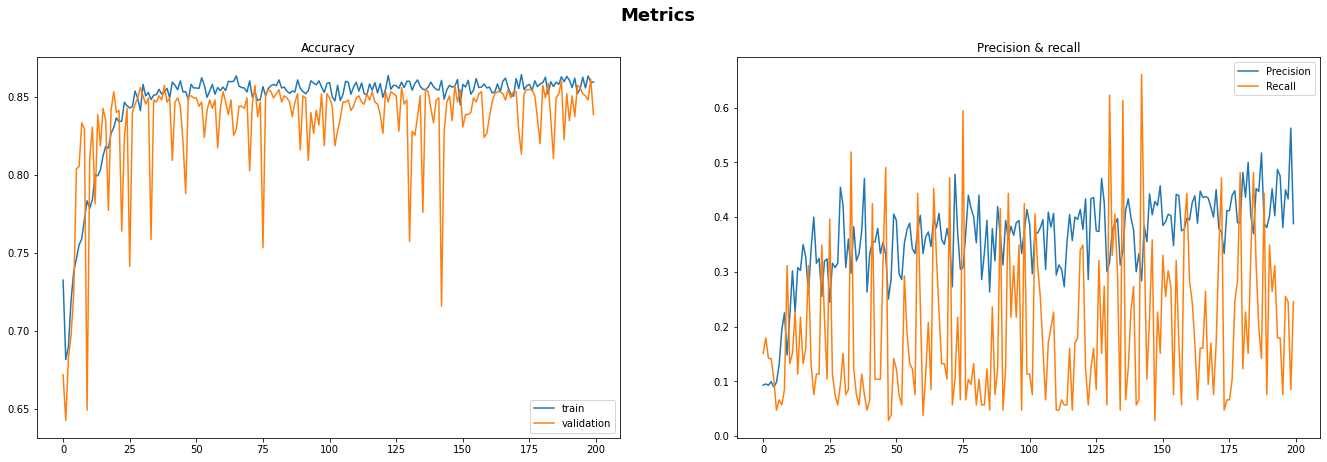

In [11]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(23, 7))

ax1.plot(history.history['accuracy'], label='train')
ax1.plot(history.history['val_accuracy'], label='validation')
ax1.set_title('Accuracy')
ax2.plot(history.history['val_precision'], label='Precision')
ax2.plot(history.history['val_recall'], label='Recall')
ax2.set_title('Precision & recall')
#ax2.plot(history.history['val_true_positives'], label='True positives')

plt.suptitle('Metrics', fontsize=18, fontweight='bold')
#plt.xticks(range(epo))
ax1.legend()
ax2.legend()
plt.show()

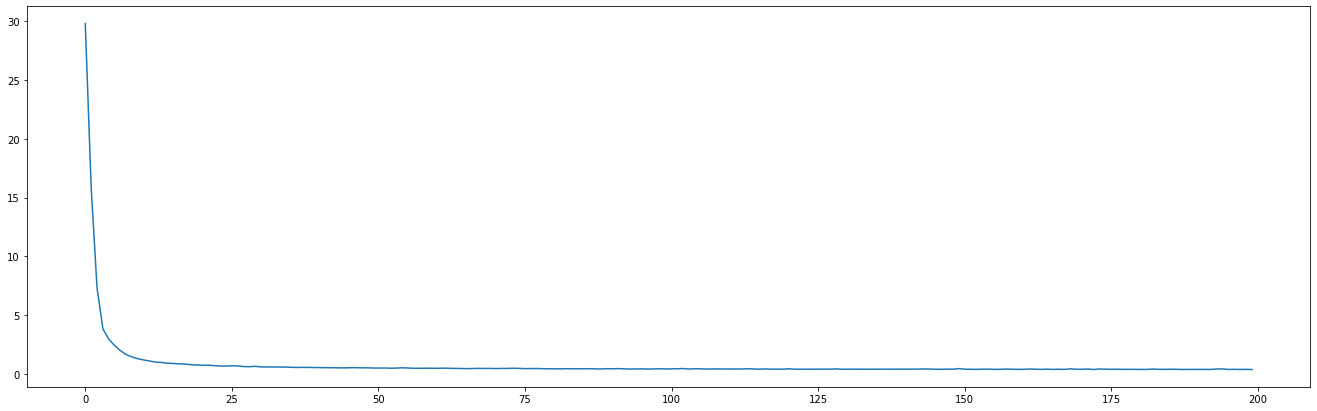

Min loss: 0.3600762188434601


In [12]:
plt.figure(figsize=(23,7))

plt.plot(history.history['loss'], label='loss')
plt.show()
print('Min loss:',min(history.history['loss']))

In [13]:
print('Max validation accuracy:', max(history.history['val_accuracy']))
print('Max validation precision:', max(history.history['val_precision']))
print('Max validation recall:', max(history.history['val_recall']))

Max validation accuracy: 0.8613333106040955
Max validation precision: 0.5625
Max validation recall: 0.6603773832321167


In [14]:
y_pred = model.predict(x_test)
#y_pred

In [15]:
import numpy as np

threshold = 0.5
y_pred = np.where(y_pred<=threshold, 0, 1)



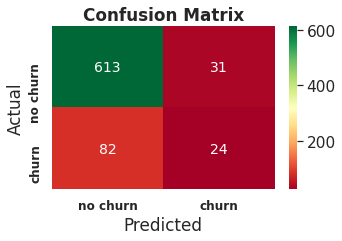


Classification report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92       644
           1       0.44      0.23      0.30       106

    accuracy                           0.85       750
   macro avg       0.66      0.59      0.61       750
weighted avg       0.82      0.85      0.83       750



In [16]:
plot_confusion_matrix(y_test, y_pred, cmap='RdYlGn', normalize=None)
print_classification_report(y_test, y_pred)

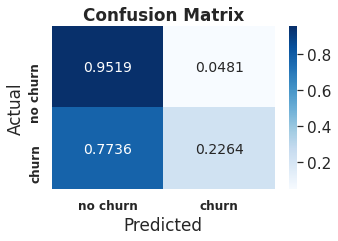

In [17]:
plot_confusion_matrix(y_test, y_pred, cmap='Blues')

In [18]:
print_classification_report(y_test, y_pred)


Classification report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92       644
           1       0.44      0.23      0.30       106

    accuracy                           0.85       750
   macro avg       0.66      0.59      0.61       750
weighted avg       0.82      0.85      0.83       750



   ## Check other training data

=== Using data: original ===
Max validation accuracy: 0.8679999709129333
Max validation precision: 1.0
Max validation recall: 0.9716981053352356
24/24 [==============================] - 0s 2ms/step - loss: 0.4618 - accuracy: 0.8493 - precision: 0.3478 - recall: 0.0755    


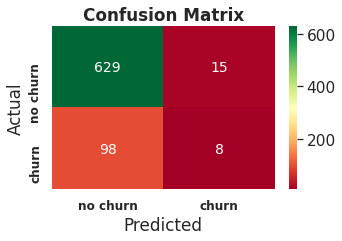



=== Using data: dropped ===
Max validation accuracy: 0.8706666827201843
Max validation precision: 0.75
Max validation recall: 0.849056601524353
24/24 [==============================] - 0s 1ms/step - loss: 0.7030 - accuracy: 0.6600 - precision: 0.2492 - recall: 0.6981    


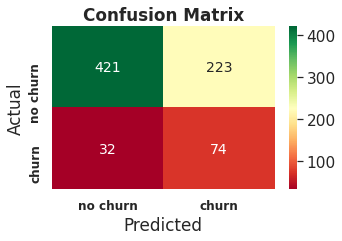



=== Using data: scaled ===
Max validation accuracy: 0.8679999709129333
Max validation precision: 0.699999988079071
Max validation recall: 0.9433962106704712
24/24 [==============================] - 0s 1ms/step - loss: 0.5218 - accuracy: 0.7893 - precision: 0.3587 - recall: 0.6226    


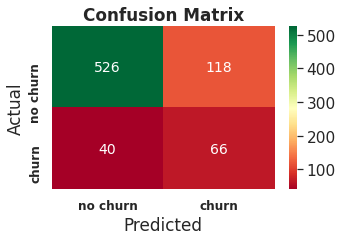



=== Using data: encoded ===
Max validation accuracy: 0.8666666746139526
Max validation precision: 0.6666666865348816
Max validation recall: 0.9056603908538818
24/24 [==============================] - 0s 1ms/step - loss: 1.8425 - accuracy: 0.4147 - precision: 0.1779 - recall: 0.8679    


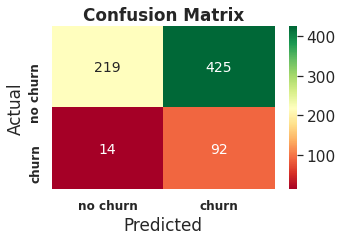



=== Using data: encoded and scaled ===
Max validation accuracy: 0.8706666827201843
Max validation precision: 0.699999988079071
Max validation recall: 0.9245283007621765
24/24 [==============================] - 0s 1ms/step - loss: 0.3912 - accuracy: 0.8640 - precision: 0.5222 - recall: 0.4434    


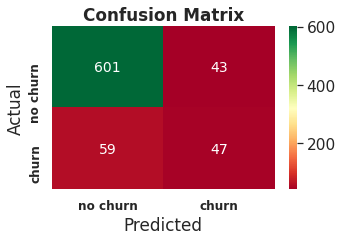



=== Using data: scaled and dropped ===
Max validation accuracy: 0.8866666555404663
Max validation precision: 1.0
Max validation recall: 0.9716981053352356
24/24 [==============================] - 0s 1ms/step - loss: 0.3183 - accuracy: 0.8893 - precision: 0.6575 - recall: 0.4528    


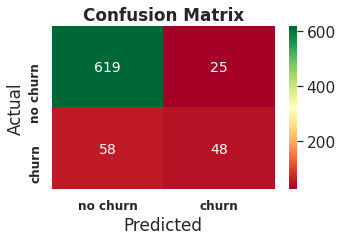

In [20]:
for input in list(data_dict.keys()):
    print('=== Using data:', input, '===')
    x_train, x_test, x_val, y_train, y_test, y_val = get_bulk_inst(data_dict, key)
    
    chk_model = build_model_seq(input_shape=20, hidden_shapes=[32], hidden_activation='relu',
                    opt='adam', dropout=0.0, loss='binary_crossentropy')
    
    history = chk_model.fit(x_train, y_train, epochs=epo, validation_data=(x_val, y_val), verbose=0)
    print('Max validation accuracy:', max(history.history['val_accuracy']))
    print('Max validation precision:', max(history.history['val_precision']))
    print('Max validation recall:', max(history.history['val_recall']))
    y_pred = chk_model.predict(x_test)
    y_pred = np.where(y_pred<=threshold, 0, 1)
    chk_model.evaluate(x_test, y_test)
    plot_confusion_matrix(y_test, y_pred, cmap='RdYlGn', normalize=None)
    print('\n')
    